In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [4]:
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width * channels

for i in range(classes) :
    path = "/Users/avi/Documents/UMKC/PythonDL/project/data/Train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
data=np.array(data)
labels=np.array(labels)

#Randomizing the order of the input images
s=np.arange(data.shape[0])
np.random.seed(43)
np.random.shuffle(s)
data=data[s]
labels=labels[s]

/Users/avi/Documents/UMKC/PythonDL/project/data/Train/0/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/1/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/2/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/3/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/4/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/5/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/6/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/7/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/8/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/9/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/10/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/11/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/12/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/13/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/14/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/15/
/Users/avi/Documents/UMKC/PythonDL/project/data/Train/16/
/Users/avi/Documents/UMK

In [5]:
#Preprocessing the Dataset
#Spliting the images into train and validation sets
(X_train,X_val)=data[(int)(0.2*len(labels)):],data[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hot encoding for the train and validation labels with to_categorial
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [32]:
#Building our CNN Model 

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='tanh', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='tanh'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='tanh'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='tanh'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='sigmoid'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [33]:
#Training the model
epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))


Train on 31368 samples, validate on 7841 samples
Epoch 1/10
31368/31368 [==============================] - 72s 2ms/step - loss: 1.1712 - accuracy: 0.6780 - val_loss: 0.1673 - val_accuracy: 0.9589
Epoch 2/10
31368/31368 [==============================] - 72s 2ms/step - loss: 0.2338 - accuracy: 0.9364 - val_loss: 0.0720 - val_accuracy: 0.9832
Epoch 3/10
31368/31368 [==============================] - 71s 2ms/step - loss: 0.1427 - accuracy: 0.9626 - val_loss: 0.0439 - val_accuracy: 0.9898
Epoch 4/10
31368/31368 [==============================] - 72s 2ms/step - loss: 0.1076 - accuracy: 0.9714 - val_loss: 0.0383 - val_accuracy: 0.9908
Epoch 5/10
31368/31368 [==============================] - 77s 2ms/step - loss: 0.0881 - accuracy: 0.9755 - val_loss: 0.0309 - val_accuracy: 0.9922
Epoch 6/10
31368/31368 [==============================] - 89s 3ms/step - loss: 0.0831 - accuracy: 0.9750 - val_loss: 0.0279 - val_accuracy: 0.9939
Epoch 7/10
31368/31368 [==============================] - 80s 3ms/ste

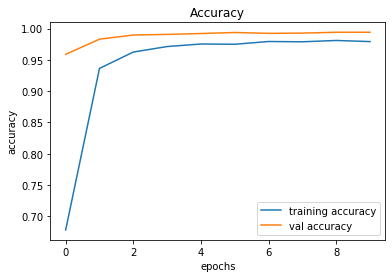

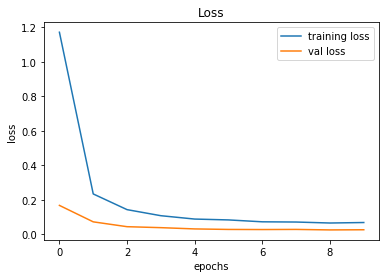

In [34]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

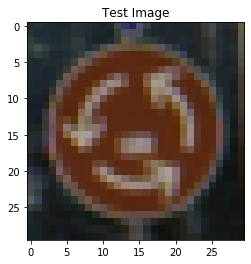

In [49]:
plt.imshow(X_test[1123,:,:],cmap='gray')
plt.title('Test Image')
plt.show()

In [40]:
#Predicting with the test data csv file
y_test=pd.read_csv("/Users/avi/Documents/UMKC/PythonDL/project/data/Test.csv")
labels=y_test['Path'].to_numpy()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('/Users/avi/Documents/UMKC/PythonDL/project/data/Test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

In [41]:
accuracy_score(y_test, pred)

0.9433095803642122